# Titanic Dataset Survival Analysis

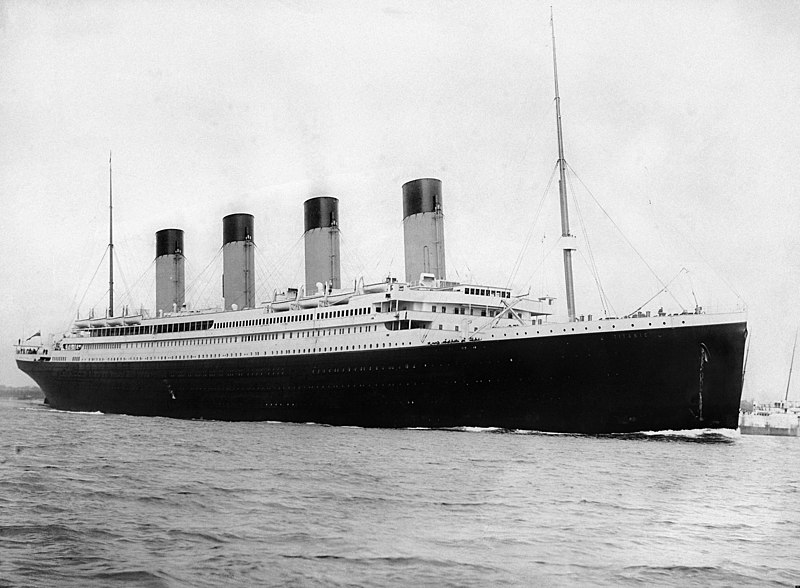

## Introduction: 

Titanic Survival Analysis project aim to dive into data to uncover what factors influenced passenger survival on the Titanic. Our mission: use Python, Pandas, Matplotlib, and Seaborn to clean data, perform Exploratory Data Analysis (EDA), and answer critical questions.

Objective: Understand the factors behind Titanic passenger survival through data analysis and visualization.

Project Road Map:

Data Cleaning: Load data, handle missing values, fix data types, and address outliers.
EDA: Provide summary stats, build a correlation matrix, and visualize survival patterns. 
Analysis Questions: Answer survival percentage, class-based rates, gender correlation, age insights, siblings/spouses' impact, embarkation port, fare correlation, age-Pclass relationship, and extra insights. 

Summary: We aim to unveil Titanic's survival secrets. Deliverables include a Jupyter Notebook with code, visuals, and answers, plus a presentation summarizing findings. Let's explore Titanic's data voyage together!


In [95]:
# import libraries for EDA
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


In [96]:
#import the dataset

train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
#import the dataset
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
#merge train and test data to inspect and clean data
df= pd.merge(train_df,test_df, how = "left")

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
#inspect the dataset
df.info()

# age and cabin donot align in number with other variables  (identify missing values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Dictionary
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	0 = male, 1 = female
* Age	Age in years	
* sibsp	Number of siblings / spouses aboard the Titanic	
* parch	Number of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

##  Data Cleaning

* Missing Values: Identify and handle missing values.
* Data Types: Check the data types of each column and convert them if necessary.
* Outliers: Identify and handle outliers, if any.

In [102]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [103]:
# check for features/colums with missing values
[features for features in df.columns if df[features].isnull().sum() > 0]

['Age', 'Cabin', 'Embarked']

In [104]:
df["Age"].mean()

29.69911764705882

In [105]:
avg_Age= np.round(df.Age.mean(), 2)
df["Age"].fillna(avg_Age, inplace= True)

In [106]:
#Drop Embark null values
df = df.dropna(subset=['Embarked'])

In [107]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## Exploratory Data Analysis (EDA)

In [108]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.653622,12.968367,0.42,22.0000,29.7000,35.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


In [109]:
df.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_14896\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030299,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074675,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327949,0.081656,0.016824,-0.548193
Age,0.030299,-0.074675,-0.327949,1.000000,-0.231875,-0.178235,0.088602
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178235,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088602,0.160887,0.217532,1.000000


# Visualize data:
Plot survival rates based on different features (e.g., Pclass, Sex, SibSp, Parch, Embarked).


In [110]:
 df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Plot the survival rate based on different features like Pclass, Sex, SibSp, Parch, Embarked, etc.


In [111]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
87,88,0,3,"Slocovski, Mr. Selman Francis",male,29.7,0,0,SOTON/OQ 392086,8.05,NaN,S


### Survival based on type of ticket

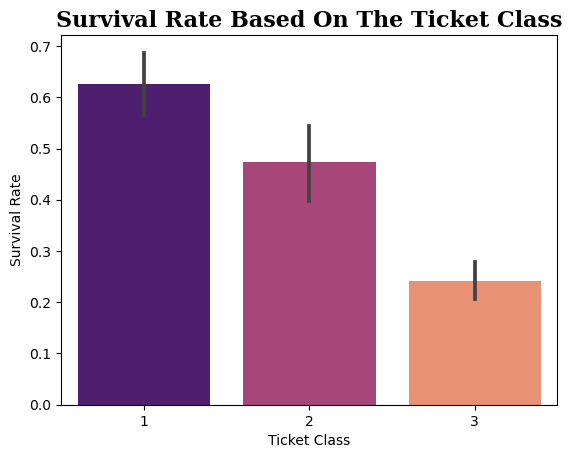

In [112]:
sns.barplot(x='Pclass', y='Survived', data=df, palette= 'magma')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Survival Rate Based On The Ticket Class', fontdict= title_font)
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

Observations
* The 3rd class ticket passengers are less likely to survive, while the 1st clas ticket passenger are the most likely to survive

### Survival  based on sex

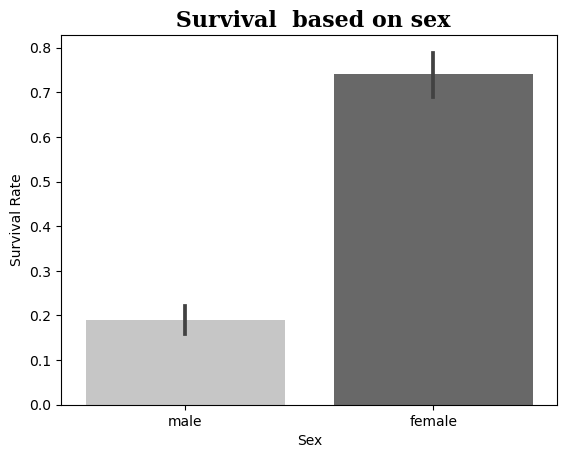

In [113]:
sns.barplot(x='Sex', y='Survived', data=df, palette= 'Greys')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' Survival  based on sex', fontdict= title_font)
plt.xlabel('Sex')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

Observation
* The female gender had a higher survival rate than the male gender

### survival rate based on SibSp

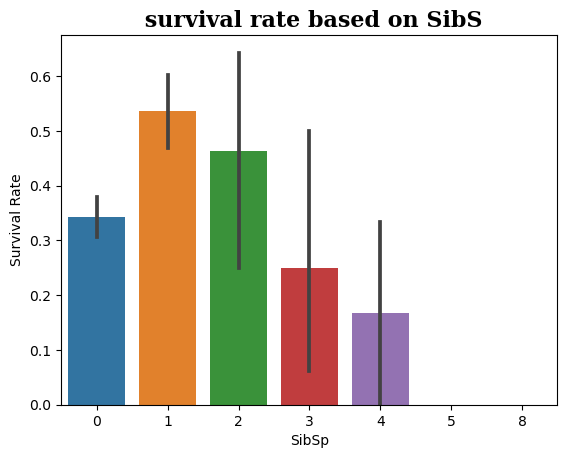

In [114]:
sns.barplot(x='SibSp', y='Survived', data=df)
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' survival rate based on SibS', fontdict= title_font)
plt.xlabel('SibSp')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

Observation
* The chances of surviving are higher with passengers having 1 sibbling or spouse onboard when compared to passengers having 4  sibblings onboard which is relatively very low. 

### survival rate based on Parch

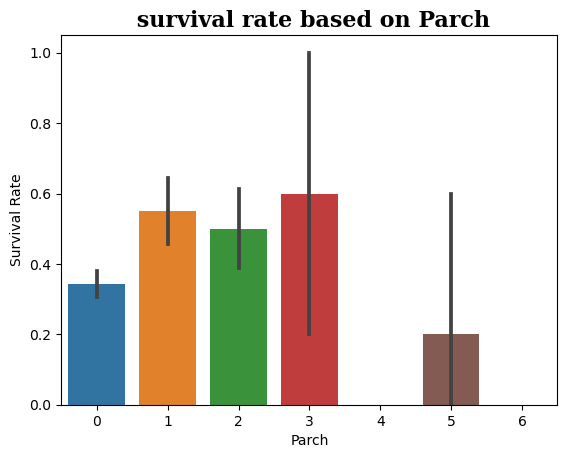

In [115]:
sns.barplot(x='Parch', y='Survived', data=df)
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' survival rate based on Parch', fontdict= title_font)
plt.xlabel('Parch')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

 
### survival rate based on Embarked


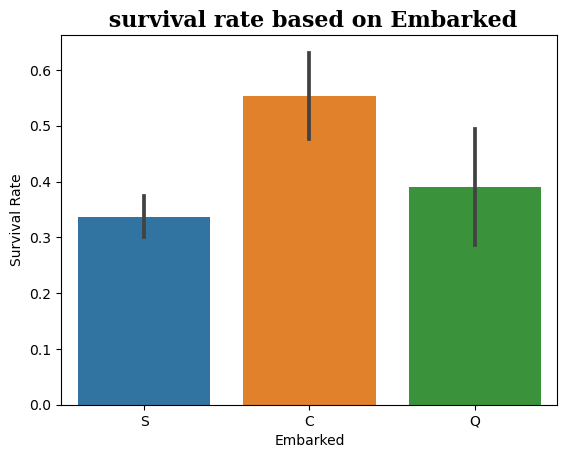

In [116]:
sns.barplot(x='Embarked', y='Survived', data=df)
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' survival rate based on Embarked', fontdict= title_font)
plt.xlabel('Embarked')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

Observation
* The chances of survival is very high if the port of Embarkation is Cherbourg and lowest when its Southampton

## Use histograms to understand the distribution of numerical variables (e.g., Age, Fare).

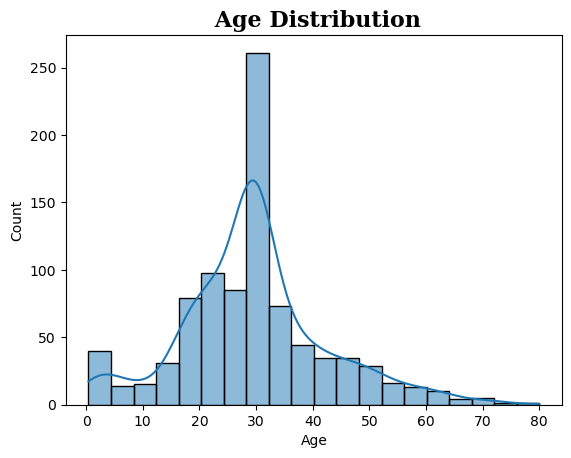

In [117]:
sns.histplot(df, x='Age', kde= True, bins=20)
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' Age Distribution', fontdict= title_font)


plt.show()

* The highest distribution falls within the age of 20-30

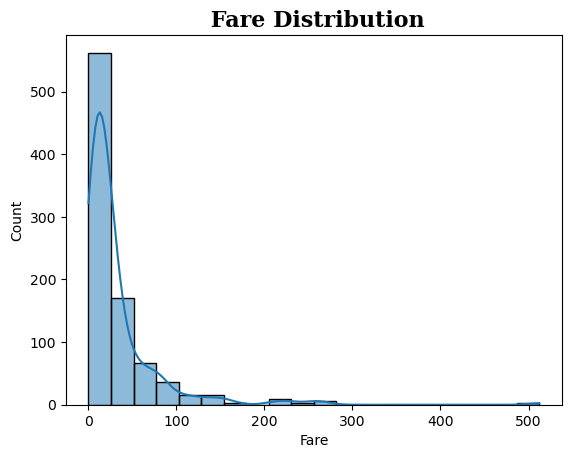

In [118]:
sns.histplot(df, x='Fare', kde= True, bins=20)
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' Fare Distribution', fontdict= title_font)


plt.show()

Observation
* The distribution for the Fare is skewed in favour of the range between 0-100

## Employ box plots to visualize numerical variable spreads and identify outliers.

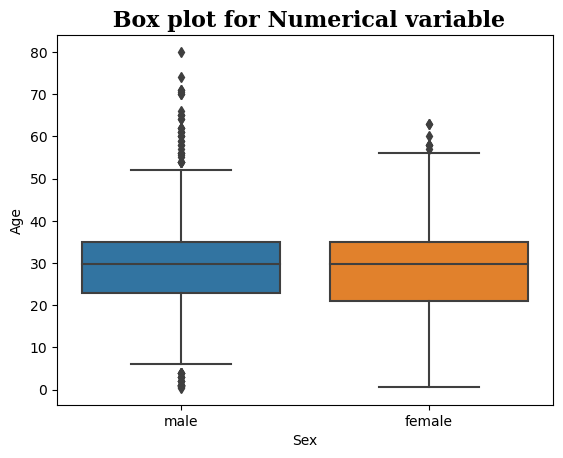

In [119]:
sns.boxplot(df, x='Sex', y='Age')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' Box plot for Numerical variable', fontdict= title_font)


plt.show()

Obserevation
* The boxplot indicates that the mean age for both male and female passenger is near  years old 
* The box plot also indicates outliers with the presence of some passengers with age  and above. However this is natural

## Utilize count plots for categorical variables.

 Dealing with categorical data sex 

In [120]:
# encode the categorical data sex

df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [121]:
df["Sex"].unique()

array([0, 1], dtype=int64)

In [122]:
# vERIFY THE COUNT OF MALE AND FEMALE ON BOARD 

df["Sex"].value_counts().reset_index().rename(columns = {'index':'Sex', 'Sex':'Count'})

,Sex,Count
0,0,577
1,1,312


<Axes: xlabel='Sex', ylabel='count'>

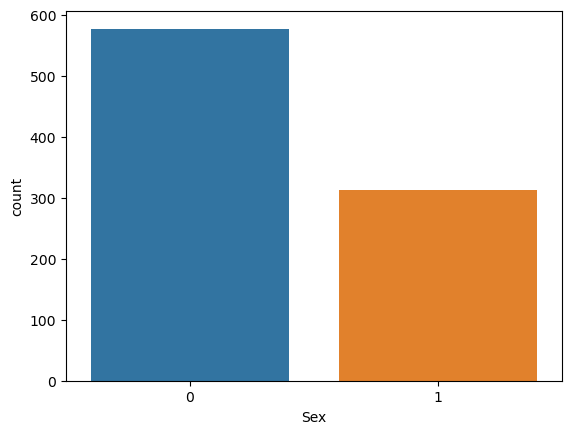

In [123]:
sns.countplot(df, x = 'Sex')

  Observation
  * There are more male passengers onboard than female

In [124]:
# encode the categorical data Embarked

df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [125]:
df['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [126]:
df["Embarked"].value_counts().reset_index().rename(columns = {'index':'Embarked', 'Embarked':'Count'})

,Embarked,Count
0,0,644
1,1,168
2,2,77


<Axes: xlabel='Embarked', ylabel='count'>

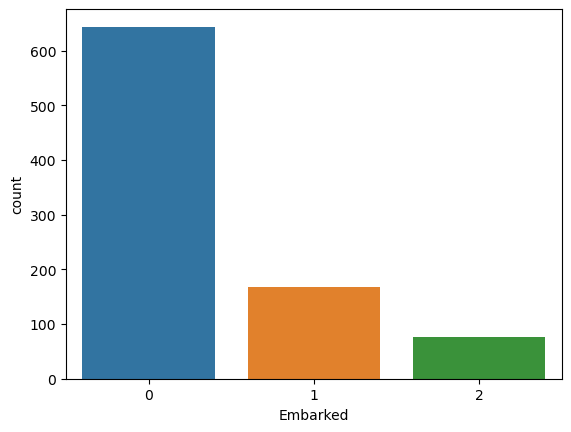

In [127]:
sns.countplot(df, x = 'Embarked')

  Observation
  * There are more passengers onboarding than from Southampton

#  Analysis Questions
1. What percentage of passengers survived the Titanic?
2. What was the survival rate for each Pclass?
3. Were gender and survival correlated? Provide statistics.
4. What was the average age of survivors and non-survivors?
5. Did having siblings or spouses on board affect the survival rate?
6. What was the survival rate based on the port of embarkation?
7. How did fare correlate with survival? Did higher fare-paying passengers have better survival?
8. Were age and Pclass correlated? Provide a visualization.
9. What other insights can you draw from the dataset? Provide at least two additional observations 
supported by data and visualizations

##### What percentage of passengers survived the Titanic?

In [128]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
459,460,0,3,"O'Connor, Mr. Maurice",0,29.7,0,0,371060,7.75,NaN,2


In [129]:
total_passengers = df['PassengerId'].count()

In [130]:
total_passengers

889

In [131]:
 survivors =df['Survived'].value_counts()[1]

In [132]:
survivors

340

In [133]:
percentage_survivors = (survivors / total_passengers) * 100

In [134]:
percentage_survivors

38.24521934758155

In [135]:
percentage_survivors_onboard = df["Survived"].value_counts().reset_index().rename(columns = {'index':'Survived', 'Survived':'Count'})

([<matplotlib.patches.Wedge at 0x2982f817c70>,
 [Text(-0.3970459950615895, 1.0258433008045393, '0'),
  Text(0.4331410855217336, -1.1191017826958611, '1')],
 [Text(-0.21657054276086699, 0.5595508913479305, '61.75p%'),
  Text(0.2526656332210112, -0.6528093732392523, '38.25p%')])

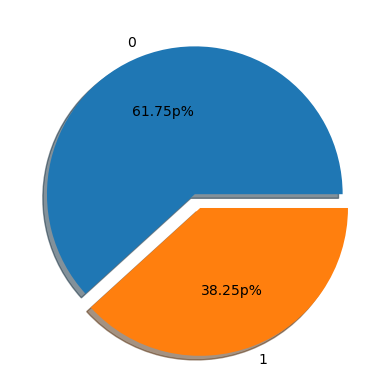

In [136]:
plt.pie(percentage_survivors_onboard['Count'], labels= percentage_survivors_onboard['Survived'], autopct='%1.2fp%%', shadow= True, explode = (0,0.1))

###### 38.25% of passengers survived the Titanic

##### What was the survival rate for each Pclass?

In [137]:
 survival_rate_by_pclass = df.groupby('Pclass')['Survived'].mean()

In [138]:
 survival_rate_by_pclass =  survival_rate_by_pclass.reset_index().rename(columns = {'Survived':'Survived Percentage'})

In [139]:
 survival_rate_by_pclass

,Pclass,Survived Percentage
0,1,0.626168
1,2,0.472826
2,3,0.242363


([<matplotlib.patches.Wedge at 0x2982f877130>,
 [Text(0.11446445216226606, 1.0940282853707177, '1'),
  Text(-0.6847083745680245, -0.860914886499481, '2'),
  Text(0.9274909146481795, -0.591405616514659, '3')],
 [Text(0.06243515572487239, 0.5967427011113005, '46.68p%'),
  Text(-0.37347729521892237, -0.46958993809062594, '35.25p%'),
  Text(0.5059041352626432, -0.32258488173526845, '18.07p%')])

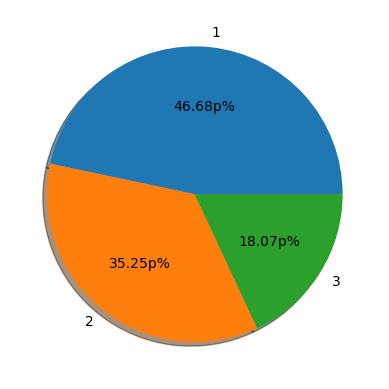

In [140]:
plt.pie(survival_rate_by_pclass['Survived Percentage'], labels= survival_rate_by_pclass['Pclass'], autopct='%1.2fp%%', shadow= True)

Observation 
* 1st class ticket holders had a higher survival rate 

##### Were gender and survival correlated? Provide statistics.

In [141]:
df[['Sex','Survived']].corr()

,Sex,Survived
Sex,1.000000,0.541585
Survived,0.541585,1.000000


<Axes: xlabel='Sex', ylabel='Survived'>

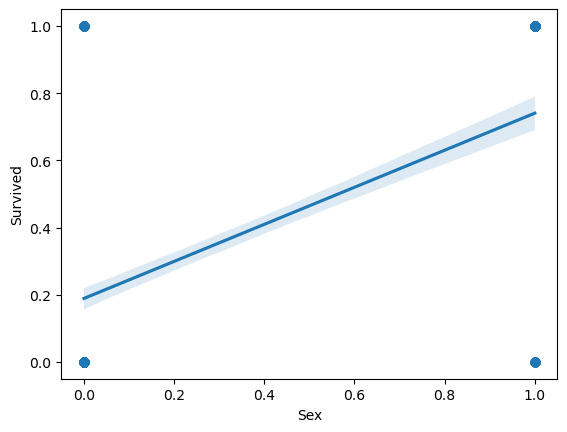

In [142]:
sns.regplot(df, x = 'Sex', y = 'Survived')

###### There is a relatively modest correlation between a passengers gender and their survival

##### What was the average age of survivors and non-survivors?

In [143]:
 survivors =df[df['Survived'] == 1 ]

In [144]:
survivors_mean_age = survivors.Age.mean()

In [145]:
print (f" The average age of survivors was {np.round(survivors_mean_age)} years old")

 The average age of survivors was 28.0 years old


In [146]:
non_survivors = df[df['Survived'] == 0 ]

In [147]:
non_survivors_mean_age = non_survivors.Age.mean()

In [148]:
print (f" The average age of non_survivors was {np.round(non_survivors_mean_age)} years old")

 The average age of non_survivors was 30.0 years old


##### The average age of non_survivors and survivors was 30 years old and 28 years old respectively

###### Did having siblings or spouses on board affect the survival rate?

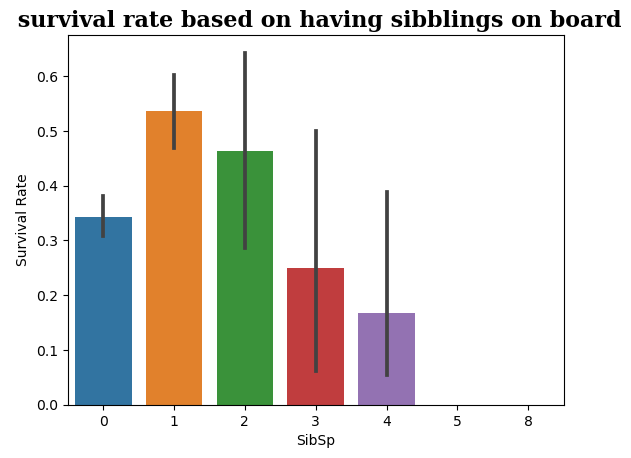

In [149]:
sns.barplot(x='SibSp', y='Survived', data=df)
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' survival rate based on having sibblings on board', fontdict= title_font)
plt.xlabel('SibSp')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

 Observation 
 * The visual indicates that the higher the amount of sibblings on board the lower the chances of survival

##### What was the survival rate based on the port of embarkation?

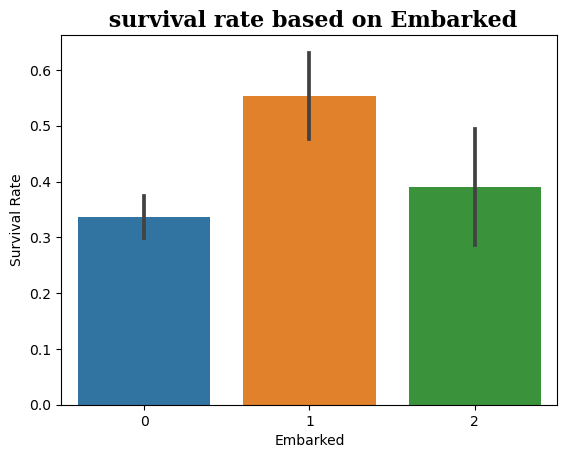

In [150]:
sns.barplot(x='Embarked', y='Survived', data=df)
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title(' survival rate based on Embarked', fontdict= title_font)
plt.xlabel('Embarked')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

Observation
* The chances of survival is very high if the port of Embarkation is Cherbourg and lowest when its Southampton

##### How did fare correlate with survival? Did higher fare-paying passengers have better survival?

In [151]:
df[['Fare', 'Survived']].corr()

,Fare,Survived
Fare,1.00000,0.25529
Survived,0.25529,1.00000


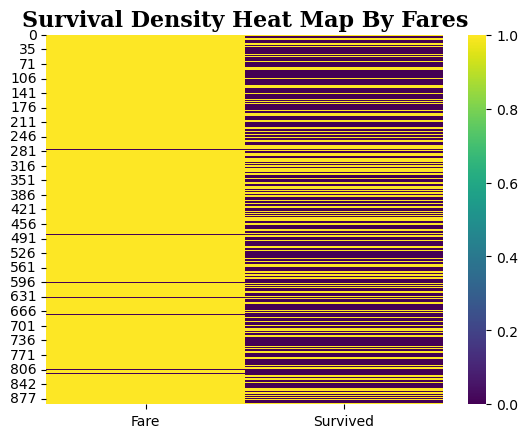

In [152]:
sns.heatmap(df[['Fare','Survived']], vmin=0, vmax=1, cmap='viridis')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Survival Density Heat Map By Fares', fontdict= title_font)
plt.show()


Observation
* It is clear that paying a higher fare does not guarantee survival rather survival is low for passengers who paid high fare

##### Were age and Pclass correlated? Provide a visualization.

In [153]:
df[['Age', 'Pclass']].corr()

,Age,Pclass
Age,1.000000,-0.327949
Pclass,-0.327949,1.000000


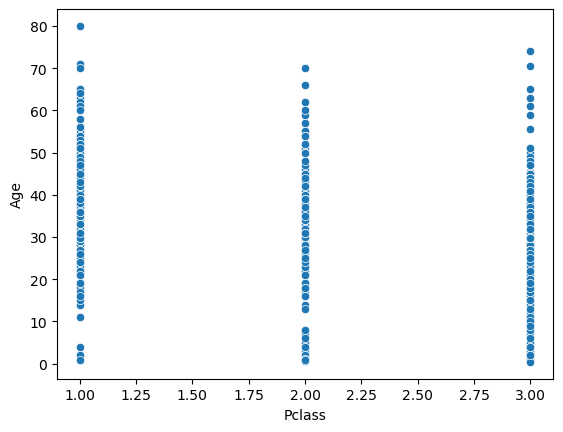

In [154]:
sns.scatterplot(df,x = 'Pclass', y = 'Age')
plt.show()

Observation
* There is a negative relationship between the Age of passengers and Pclass

##### What other insights can you draw from the dataset? Provide at least two additional observations supported by data and visualizations

## summary of findings, and recommendations from the Exploratory Snalysis of the Titanic  Dataset.

##                         Summary
###  The aim of the analysis was to explore the titanic data set for key insights and valuable information that might have relationship with a passengers survival. The key processeses followed included data cleaning, data preprocessing, data exploration, calculation of survival rate and the relationship between different factors on passengers survival. Categorical data such as gender, ticket class, and port of embarkation were explored, and Numerical data were also examined for the presence of outliers 

### Key Insights
### 1.The percentage of passengers survived the Titanic.

### 2. It was discovered that survival rate was higher for passengers on a 1st class ticket     than other types of ticket holders.

### 3. The female gender had a higher chance of survival. 
### 4. The average age of survivors was 28 years and non-survivors was 30 years.

### 5. It was discovered that having higher number of siblings or spouses on board affected the survival rate negatively.

### 6. The survival rate was higher for passengers who boarded the ship at Cherbourg.

### 7. It was discovered that passengers who paid higher fare didnt get higher chances of survival.

### 8. There was a negative relationship  between passengers Age and Pclass.  

###  Conclusion and Recommendation
### The analysis presented valuable insights to how various factors can account for a passengers survivals chance in the titanic. This is important because it gives a guide to what and what matters in terms of survival chances in such situation of distress. 
### The survival rate was higher for passengers who boarded the ship at Cherbourg, and it was discovered that survival rate was higher for passengers on a 1st class ticket than other types of ticket holders. However the reasons for these outcomes remain unknown and could be a point of departure for further inquiry


In [155]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [156]:
# Data preprocessing 
# delete colums not useful for predictive analysis. 
DeleteCols = [ 'Name','Ticket', 'Cabin','PassengerId']
df = df.drop(DeleteCols,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [158]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [165]:
ColumnForAnalysis = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']

## KNN Machine Learning model 


In [220]:
# importing model ttrainer 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=10)

In [221]:
# defining relevant columns for model training

predictorcolumns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
Targetcolumns = 'Survived'
x = df[predictorcolumns].values
y = df[Targetcolumns].values

In [222]:
from sklearn.preprocessing import StandardScaler

In [223]:
# Scaling the data
scaler = StandardScaler()

In [224]:
scaled_x_train = scaler.fit_transform(x_train)

In [225]:
scaled_x_test = scaler.transform(x_test)

In [226]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn_model =  KNeighborsClassifier(n_neighbors=1)
print(clf)
KNN = knn_model.fit(x_train,y_train)
prediction=KNN.predict(x_test)
from sklearn import metrics
print (metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       115
           1       0.58      0.65      0.61        63

    accuracy                           0.71       178
   macro avg       0.69      0.69      0.69       178
weighted avg       0.72      0.71      0.71       178

[[85 30]
 [22 41]]


In [227]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))

0.7078651685393258


load and deploy the model

In [228]:
from joblib import dump,load

In [229]:
dump(knn_model,'titanic_survial_model.joblib')

['titanic_survial_model.joblib']

In [230]:
# loading the model  
loaded_model = load('titanic_survial_model.joblib')

Create a random passenger and deploy the model on it to predict survival 

In [231]:
random_passeanger = [[2,1,27,0,1,50,0]]

In [232]:
loaded_model.predict(random_passeanger)

array([0], dtype=int64)

## Random Forest


In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
rf= RandomForestClassifier(n_estimators=100)

In [235]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [236]:
rf_pred= rf.predict(x_test)

In [237]:
rf_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0], dtype=int64)

In [238]:
print(f"KNN accuracy is {round(accuracy_score(y_test, rf_pred)*100,2)}%")

KNN accuracy is 84.83%


In [239]:
print (metrics.classification_report(y_test, rf_pred))
print(metrics.confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       115
           1       0.79      0.78      0.78        63

    accuracy                           0.85       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178

[[102  13]
 [ 14  49]]


load and deploy the model

In [240]:
from joblib import dump,load

In [241]:
dump(rf_pred,'titanic_survial_model.joblib')

['titanic_survial_model.joblib']

Create a random passenger and deploy the model on it to predict survival 

In [243]:
random_passeanger = [[2,1,27,0,1,50,0]]

In [244]:
loaded_model.predict(random_passeanger)

array([0], dtype=int64)

Observation
* The Random Forest model has the highest accuracy level and as such it is the most trusted model for the Titanic Survival Preduction

## Titanic Survival Prediction Model Report

 This report outlines the development of a machine learning model to predict passenger survival using the Titanic dataset. We detail the steps involved in model creation, evaluate its performance, and showcase its deployment for predicting survival in new passenger scenarios.

Model Development
Data Preprocessing
Our initial step involved data preprocessing, including:

 Data Scaling: We employed Scikit-Learn's StandardScaler to ensure consistent feature scaling. This is vital for distance-based algorithms, such as K-Nearest Neighbors (KNN).
#### Model Selection and Training
For this task, we opted for the K-Nearest Neighbors (KNN) algorithm, known for its simplicity and effectiveness and the Random Forest model touted for its effectiveness in handling categorical data. We configured a KNN classifier with n_neighbors=5, and the Random Forest classifier with RandomForestClassifier(n_estimators=100) and trained it using scaled training data (scaled_X_train) and target labels (y_train) and (x_train,y_train) respectively.

#### Model Evaluation
We assessed the models performance using the test dataset  via two key metrics:

Accuracy Score: The KNN model achieved an accuracy score of approximately 70%, and the Random Forest achieved a score of 84% signifying the proportion of correctly predicted survival outcomes. The Ran dom Forest model emerged the most reliable mode for prediction.

Classification Report: This report offers precision, recall, and F1-score insights for both survival and non-survival classes, along with support values. Our models exhibited balanced performance, demonstrating good precision and recall for both classes.

#### Model Deployment

#### Model Saving
Post-training and evaluation, we saved the models to a file using the joblib library. The saved model file is named "titanic_survival_model.joblib" and encompasses all essential information for making predictions.

#### Model Loading and Testing
To demonstrate model deployment and usage, we followed these steps:

Loading the Model: We loaded the model using the load function from joblib.

Testing with New Data: We generated a new dataset representing a passenger with specified features.

Prediction: Utilizing the loaded model, we predicted a survival outcome of "0" for the new passenger data, indicating non-survival.

#### Conclusion
In brief, we have created two machine learning models - one using KNN and the other using Random Forest - to predict whether passengers would survive the Titanic disaster. These models had an accuracy rate of 70% and 80%, respectively, and were able to accurately predict both survival and non-survival outcomes. We have also made sure that these models can be used to predict survival outcomes for new passengers.

Our models are useful for predicting survival outcomes on datasets that are similar to the Titanic dataset. They also provide insights into the various factors that may have influenced passenger survival during the disaster. We believe that further improvements and feature engineering could lead to even better predictive performance.